In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("../input/usarrests/USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

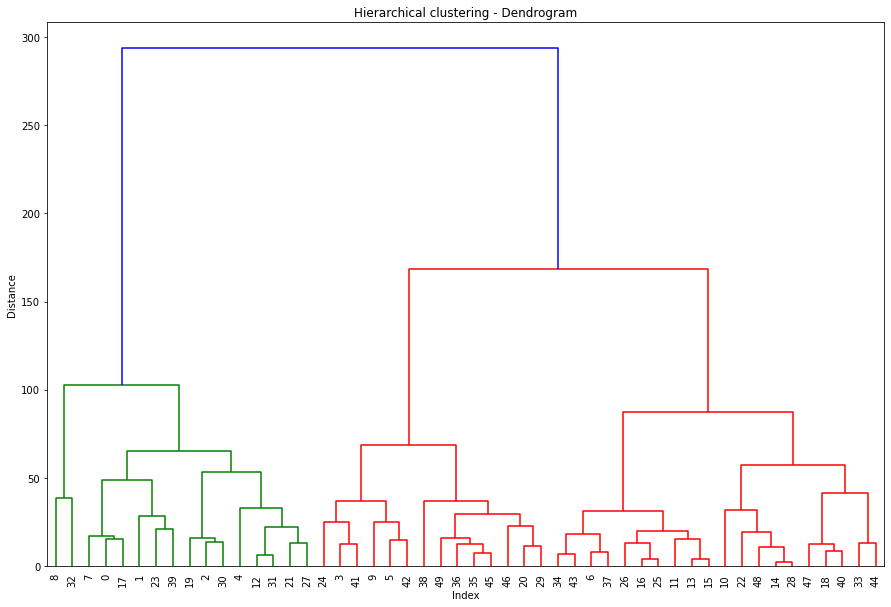

In [4]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical clustering - Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

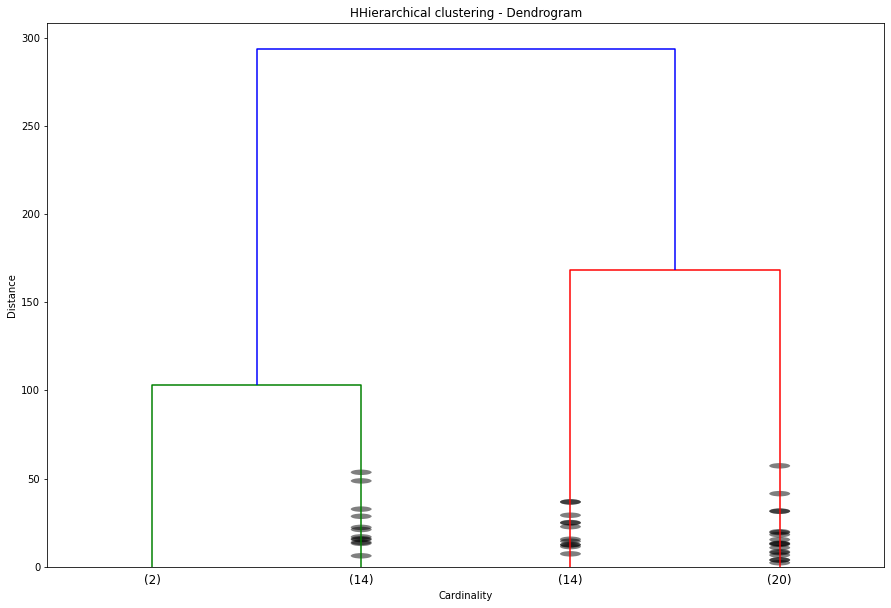

In [5]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('HHierarchical clustering - Dendrogram')
plt.xlabel('Cardinality')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,                       #for 4 clusters
    show_contracted = True
);

In [6]:
df.shape

(50, 4)

In [7]:
from sklearn.cluster import AgglomerativeClustering
Cluster=AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="ward")   #We indicated that 4 is more preferable

In [8]:
Cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [9]:
pd.DataFrame({"States" : df.index, "Clusters": Cluster.fit_predict(df)})[0:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [11]:
df["Clusters' Number"]=Cluster.fit_predict(df)
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters Number,Clusters' Number
Alabama,13.2,236,58,21.2,0,0
Alaska,10.0,263,48,44.5,0,0
Arizona,8.1,294,80,31.0,0,0
Arkansas,8.8,190,50,19.5,2,2
California,9.0,276,91,40.6,0,0


Thanks to https://github.com/mvahit/DSMLBC